L'étude consiste en la prédiction des prix des maisons en Californie.
Le fichier de données a été récupéré sur Kaggle.

Menu :
- Nettoyage des données
- Régression linéaire
- Random Forest Regressor
- Random Forest Regressor - Grid Search
- Camembert

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploration des données

In [3]:
pd.options.display.max_columns = None   # pour permettre de visualiser toutes les colonnes
df = pd.read_csv("housing.csv")         # lecture et chargement des données
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].head()
df = df.astype({'ocean_proximity' : 'category'})   # changement de type (sera utile plus tard)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [8]:
# visualiser les données pour lesquelles la valeur médiane des maisons est > 100 000 dollars

df[df['median_house_value']>100000]#.count()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20629,-121.39,39.12,28.0,10035.0,1856.0,6912.0,1818.0,2.0943,108300.0,INLAND
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND


In [9]:
# Création d'une nouvelle variable : le nb de chambres à coucher par foyer

df['bedrooms_per_household'] = df['total_bedrooms']/df['households']
df['bedrooms_per_household'].mean()

# en moyenne 1 chambre à coucher par foyer (on s'attendrait à plus cependant)

1.0970623858069932

In [10]:
# Création d'une autre nouvelle variable : le nb de pièces par foyer

df['rooms_per_household'] = df['total_rooms']/df['households']
df['rooms_per_household'].mean()

# en moyenne 5 pièces par foyer

5.428999742190365

In [11]:
# Supprimer du dataframe 2 variables inutiles pour notre cas d'étude (nous utilisons moins de mémoire)

df = df.drop(['latitude'], axis=1)
df = df.drop(['longitude'], axis=1)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_household,rooms_per_household
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1.023810,6.984127
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.971880,6.238137
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1.073446,8.288136
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1.073059,5.817352
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1.081081,6.281853


In [12]:
# Statistiques

df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_household,rooms_per_household
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.097062,5.429000
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.476104,2.474173
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.333333,0.846154
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.006029,4.440716
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.048889,5.229129
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.099631,6.052381
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,34.066667,141.909091


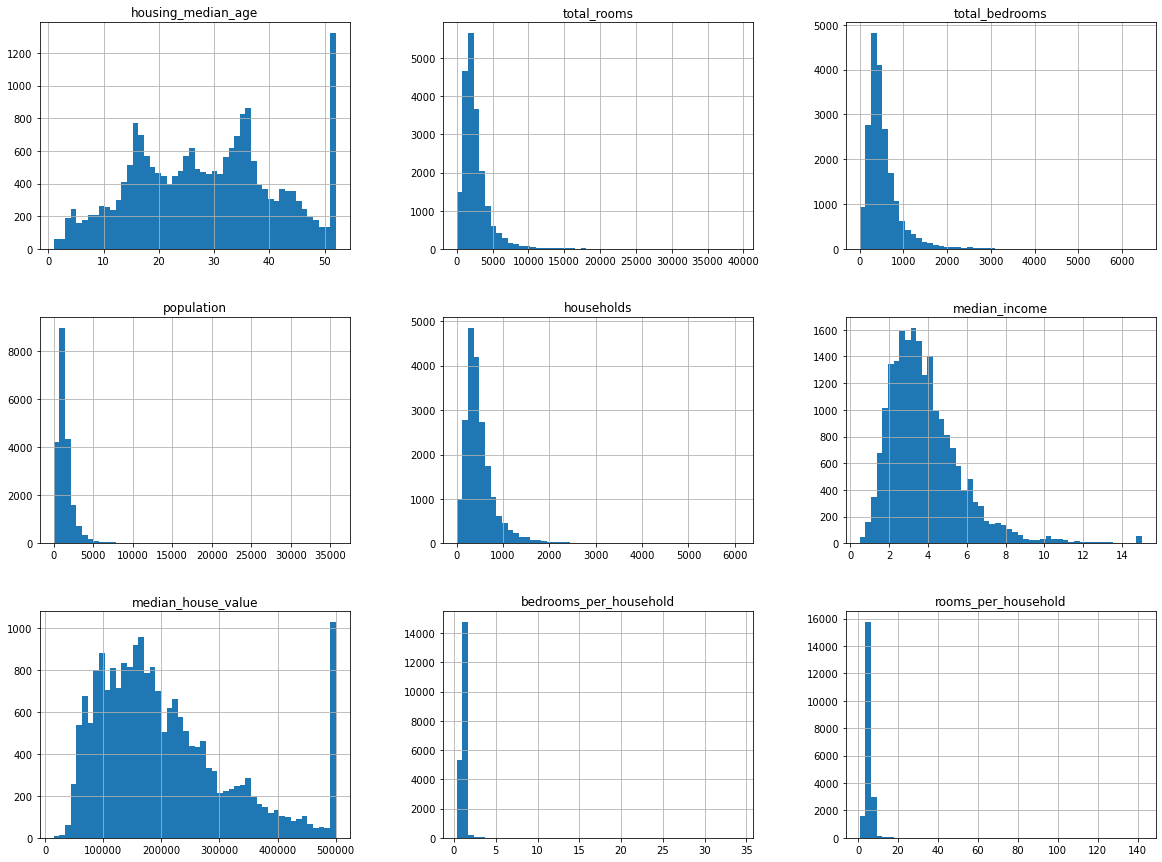

In [14]:
# Histogrammes pour chacune de nos variables

df.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

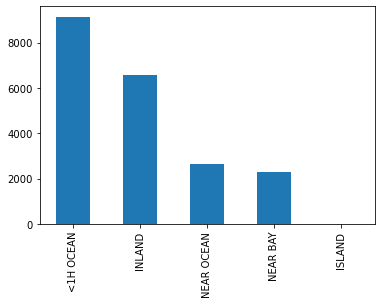

In [15]:
# La variable 'ocean_proximity' n'étant pas un nombre, il n'est pas possible d'en faire un histogramme des valeurs.
# Il est cependant possible de compter le nombre de fois où l'on a telle ou telle valeur (inland, island, etc.) 
# et d'en faire un histogramme.

df['ocean_proximity'].value_counts().plot(kind='bar')

### Matrice de corrélation

In [16]:
# On définit la matrice de corrélation
corr_matrix = df.corr()

# Corrélations entre 'median_house_value' et les autres variables :
corr_matrix['median_house_value'].sort_values(ascending=False)

# Corrélations entre 'total_rooms' et les autres variables :
corr_matrix['total_rooms'].sort_values(ascending=False)

# On peut voir par exemple que le nombre total de pièces est positivement corrélée à la population
# i.e. plus la population est grande, plus il y a de pièces.
# La valeur immobilière augmente lorsque le salaire augmente.

total_rooms               1.000000
total_bedrooms            0.930380
households                0.918484
population                0.857126
median_income             0.198050
median_house_value        0.134153
rooms_per_household       0.133798
bedrooms_per_household    0.029373
housing_median_age       -0.361262
Name: total_rooms, dtype: float64

<AxesSubplot:>

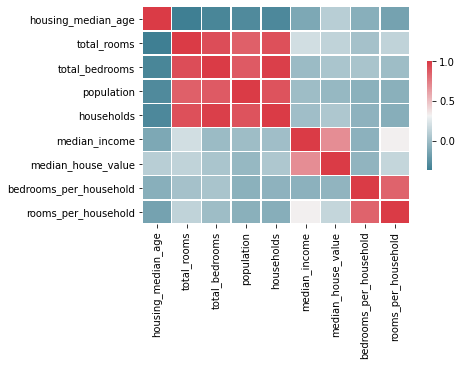

In [17]:
# Ci-dessous les corrélations entre les différentes variables
# Lorsqu'on a une corrélation positive, la couleur tend vers le rouge
# Tandis que lorsqu'elle est négative, elle tend vers le vert foncé
# Une corrélation presque nulle (2 variables qui ont très peu d'influences entre elles) sera dans le vert clair.

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, cbar_kws={"shrink": .5}, linewidths=.5)

### Préparation des données

In [14]:
# La variable que l'on aimerait prédire est la 'median_house_value' (valeur médian des maisons)

df.describe()['median_house_value']

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

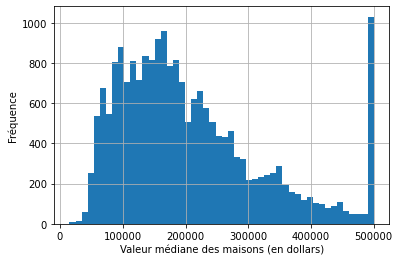

In [15]:
df['median_house_value'].hist(bins=50)
plt.xlabel('Valeur médiane des maisons (en dollars)')
plt.ylabel('Fréquence')
plt.show()

# remarque : il y a peut-être des outliers aux environs des 500 000 dollars

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Séparation des données : 90% en train, 10% en test

train_set, test_set = train_test_split(df, test_size=0.1, random_state=42)

In [20]:
df.describe()
train_set.describe()
test_set.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_household,rooms_per_household
count,2064.000000,2064.000000,1857.000000,2064.000000,2064.000000,2064.000000,2064.000000,1857.000000,2064.000000
mean,28.891473,2618.275678,537.943996,1411.264535,498.548934,3.851189,206802.515988,1.097714,5.396306
std,12.486613,2179.862623,443.171473,1063.192039,388.164392,1.970345,115509.990864,0.377533,2.087917
min,1.000000,6.000000,2.000000,8.000000,2.000000,0.499900,30000.000000,0.500000,1.972644
25%,19.000000,1429.750000,295.000000,785.750000,277.000000,2.558600,119175.000000,1.003876,4.384947
50%,29.000000,2116.000000,427.000000,1151.000000,404.000000,3.460900,180750.000000,1.047703,5.151479
75%,37.000000,3112.500000,647.000000,1707.000000,602.000000,4.621100,264400.000000,1.098182,6.007067
max,52.000000,24121.000000,5419.000000,10493.000000,4930.000000,15.000100,500001.000000,8.476190,41.333333


In [21]:
# Isolation (et suppression du DF de base) de la variable qui nous intéresse pour chacun des sets (train et test)

price_train = train_set['median_house_value']
train_set = train_set.drop(['median_house_value'], axis=1)
price_test = test_set['median_house_value']
test_set = test_set.drop(['median_house_value'], axis=1)

### Nettoyage des données
##### Remplir les données manquantes
##### Arranger les outliers

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
df.info()
# Pour 'total_bedrooms' nous avons 20433 données au lieu de 20640, soit 207 données manquantes.
# Et d'après les histogrammes, on pourrait croire que l'on ait des outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   housing_median_age      20640 non-null  float64 
 1   total_rooms             20640 non-null  float64 
 2   total_bedrooms          20433 non-null  float64 
 3   population              20640 non-null  float64 
 4   households              20640 non-null  float64 
 5   median_income           20640 non-null  float64 
 6   median_house_value      20640 non-null  float64 
 7   ocean_proximity         20640 non-null  category
 8   bedrooms_per_household  20433 non-null  float64 
 9   rooms_per_household     20640 non-null  float64 
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [26]:
# sélectionne uniquement la colonne dont le type est 'category' dans le train set:
cat_attribs_df = train_set.select_dtypes(include=['category'])
cat_attribs_df

# et sélectionne uniquement le nom de cette colonne (sans les valeurs):
cat_attribs = list(cat_attribs_df)
cat_attribs

['ocean_proximity']

In [27]:
# sélectionne uniquement les colonnes dont le type est 'int64' ou bien 'float64' dans le train set:
num_attribs_df = train_set.select_dtypes(include=['int64','float64'])
num_attribs_df

# sélectionne uniquement le nom de ces colonnes (sans les valeurs):
num_attribs = list(num_attribs_df)
num_attribs

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'rooms_per_household']

In [30]:
# petit test pour vérifier si on a bien le compte:

if (len(num_attribs) + len(cat_attribs) == len(list(train_set))):
    print("rien oublié")
else:
    print("erreur")

rien oublié


In [31]:
# Les pipelines vont 'nettoyer' les données : à l'entrée les données à nettoyer,
# en sortie les données nettoyées.

# Pour les nombres, SimpleImputer() va remplacer les valeurs manquantes par, ici, la médiane.
# StandardScaler() va normaliser ces valeurs (bon pour la précision des algos):

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [32]:
# Faire un num_pipeline que sur les num_attribs
# Faire un OneHotEncoder() que sur les cat_attribs

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

# Cet objet créé pourra ensuite être appliqué au training set:

In [33]:
train_set_prepared = full_pipeline.fit_transform(train_set)
train_set_prepared[0]   # première ligne nettoyée

# Nous n'avons plus de valeurs manquantes, et elles sont toutes normalisées

array([ 0.98351287, -0.07457422, -0.01398847, -0.00969912, -0.07768305,
       -0.01883674,  0.07201694, -0.06631495,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

### Machine Learning

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
# Entraînement du modèle - avec le training set

lin_reg = LinearRegression()   # création de l'objet
lin_reg.fit(train_set_prepared, price_train)   # entraînement du modèle

# Rappels:
# train_set_prepared : données du training set qui ont été préparées/nettoyées
# price_train : valeurs que l'on veut prédire et que l'on utilise pour le training

LinearRegression()

In [38]:
# Test du modèle, sur 10 maisons :

In [39]:
part_data_test = test_set.iloc[:10]
part_data_test

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms_per_household,rooms_per_household
20046,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND,NaN,4.192201
3024,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,NaN,5.039384
15663,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY,NaN,3.977155
20484,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,NaN,6.163636
9814,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN,NaN,5.492991
13311,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,NaN,5.251483
7113,36.0,1375.0,NaN,670.0,221.0,5.0839,<1H OCEAN,NaN,6.221719
7668,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN,NaN,4.962825
18246,4.0,2292.0,NaN,1050.0,584.0,4.8036,NEAR BAY,NaN,3.924658
5723,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN,NaN,6.879056


In [40]:
part_price_test = price_test.iloc[:10]
part_price_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
13311    158700.0
7113     198200.0
7668     157500.0
18246    340000.0
5723     446600.0
Name: median_house_value, dtype: float64

In [41]:
# Préparation des données du test set (normalisation, remplacement des NaN)
# On transforme les données grâce à la pipeline :

data_test_prepared = full_pipeline.transform(part_data_test)
data_test_prepared

array([[-0.28671279, -0.51916103, -0.24302556, -0.03075389, -0.36850554,
        -1.15848302, -0.09903561, -0.49353058,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.11023273,  0.13992745, -0.24302556,  0.12101588,  0.22099952,
        -0.7091262 , -0.09903561, -0.1564619 ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.85679302,  0.54647229, -0.24302556, -0.102691  ,  1.21398804,
        -0.20759726, -0.09903561, -0.57909086,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-0.92182562,  0.18942784, -0.24302556,  0.24383535, -0.01218248,
         0.9857012 , -0.09903561,  0.29084453,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.42778914, -0.131408  , -0.24302556, -0.31937963, -0.18772399,
        -0.07814486, -0.09903561,  0.02401474,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-1.31877114,  0.820099

In [42]:
# Prédiction des prix de 10 maisons
# On applique le modèle entraîné sur les données préparées du test set :

print("Predictions: ", lin_reg.predict(data_test_prepared))   # 10 prix prédits
print("Labels: ", list(part_price_test))                      # 10 prix véritables

Predictions:  [ 54325.05476027 101104.28082547 284238.11727394 268409.07402061
 240549.42043825 157884.27009501 283464.52232007 224482.33004325
 263331.78853594 416689.57368589]
Labels:  [47700.0, 45800.0, 500001.0, 218600.0, 278000.0, 158700.0, 198200.0, 157500.0, 340000.0, 446600.0]


### Performance du modèle

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
# test sur toutes les maisons (et non plus sur 10 maisons uniquement)

test_set_prepared = full_pipeline.transform(test_set)
predictions = lin_reg.predict(test_set_prepared)
predictions

array([ 54325.05476027, 101104.28082547, 284238.11727394, ...,
       269262.53534821, 162801.42388615, 143186.91088853])

In [45]:
# Mean Squared Error

mse = mean_squared_error(price_test, predictions)
rmse = np.sqrt(mse)
rmse

# En moyenne, notre modèle fait une erreur de 72k dollars sur le prix des maisons
# C'est énorme, testons donc un autre modèle

72284.35597924617

### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
forest_reg.fit(train_set_prepared, price_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [50]:
test_set_prepared = full_pipeline.transform(test_set)
predictions = forest_reg.predict(test_set_prepared)

In [51]:
mse = mean_squared_error(price_test, predictions)
rmse = np.sqrt(mse)
rmse

# Cette fois-ci notre nouveau modèle fait une erreur moyenne de 65k dollars
# C'est mieux qu'avant, mais on pourrait toujours améliorer ce modèle (Random Forest Regressor)
# en jouant sur quelques paramètres

65269.656365607414

### Amélioration de notre modèle Random Forest Regressor - Grid Search
##### En jouant sur le nombre d'arbres, profondeur de l'arbre etc.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# On teste 3x4x3=36 paramétrages différents du modèle, en faisant varier
# nombre d'arbres, nombre de features à prendre en compte, profondeur de l'arbre (nb d'étages)

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8], 'max_depth': [6, 8, 10]}
]

forest_reg = RandomForestRegressor(random_state=42, n_jobs=-1)   # n_jobs=-1 : utilise tous les processeurs pour aller +vite
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')      # cv=5 coupe le training set en 5
grid_search.fit(train_set_prepared, price_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid=[{'max_depth': [6, 8, 10], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             scoring='neg_mean_squared_error')

In [55]:
# Meilleurs paramètres :

grid_search.best_params_
final_model = grid_search.best_estimator_
final_model

RandomForestRegressor(max_depth=10, max_features=8, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [56]:
# Prédiction des prix en utilisant cette fois-ci les meilleurs paramètres déterminés
# grâce au grid search

final_predictions = final_model.predict(test_set_prepared)
final_mse = mean_squared_error(price_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# Nous obtenons une erreur moyenne de 64k dollars sur l'estimation de la valeur des maisons
# Grâce au Grid Search, notre modèle s'est légèrement amélioré.

64687.4565843594

### Résultats
#### Quels sont donc les paramètres qui ont la plus forte influence sur le prix des maisons ?

In [57]:
final_model.feature_importances_

# Nous obtenons des valeurs (d'importance) pour chacune des features mais il est difficile de savoir 
# à quelles features chacune d'elles correspondent.
# Pour les 'category', elles ont été encodées par OneHotEncoder. 
# Pour les récupérer, il faut créer un autre OneHotEncoder (indépendant de la pipeline)

array([0.06080181, 0.01986538, 0.02883977, 0.03780577, 0.01962357,
       0.52383881, 0.02604654, 0.05803048, 0.011267  , 0.20374804,
       0.00070338, 0.00590325, 0.00352621])

In [58]:
encoder = OneHotEncoder()
encoder.fit_transform(train_set[cat_attribs])   # fit seulement pour les colonnes des catégories du train set
encoded_cat_attribs = encoder.get_feature_names()   # obtenir le nom des colonnes
encoded_cat_attribs

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [59]:
# On accole les résultats

list_features = np.append(num_attribs, encoded_cat_attribs)
list_features
# retourne la liste de toutes les features (dans l'ordre) qui vont être utlisées dans notre modèle.
# pour plus de lisibilité :

list_features = list(list_features)
list_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'rooms_per_household',
 'x0_<1H OCEAN',
 'x0_INLAND',
 'x0_ISLAND',
 'x0_NEAR BAY',
 'x0_NEAR OCEAN']

In [60]:
df_features = pd.DataFrame(data=list_features, columns=['features'])
df_features

,features
0,housing_median_age
1,total_rooms
2,total_bedrooms
3,population
4,households
5,median_income
6,bedrooms_per_household
7,rooms_per_household
8,x0_<1H OCEAN
9,x0_INLAND


In [61]:
# Visualisation claire des features qui impactent la valeur des maisons :

df_features['importance'] = final_model.feature_importances_
df_features

,features,importance
0,housing_median_age,0.060802
1,total_rooms,0.019865
2,total_bedrooms,0.028840
3,population,0.037806
4,households,0.019624
5,median_income,0.523839
6,bedrooms_per_household,0.026047
7,rooms_per_household,0.058030
8,x0_<1H OCEAN,0.011267
9,x0_INLAND,0.203748


Quelques observations pour se donner une idée :
Le salaire a beaucoup d'impact sur la valeur de la maison.
Le nombre de pièces a un fort impact sur la valeur de la maison.
Le fait que la maison soit sur île a un très faible impact sur sa valeur, ce qui est assez surprenant.
Le fait que la maison soit près de l'océan a peu d'impact sur sa valeur, ce qui est à nouveau surprenant.

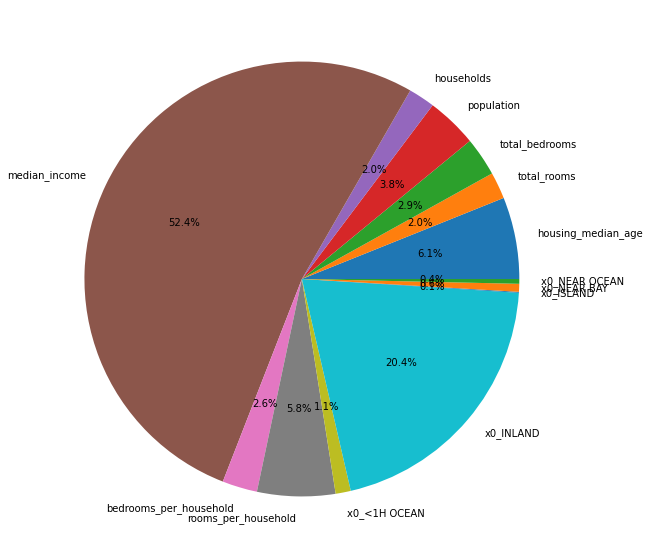

In [62]:
plt.figure(figsize=(10, 10))
plt.pie(final_model.feature_importances_, 
        labels = list_features, 
        autopct='%1.1f%%'
       )

plt.show()